In [107]:
import textstat as txst
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

train_df = pd.read_csv('data/train.csv', encoding = 'latin-1')

def punct (text):
    return len([x for x in text if x in string.punctuation])

def punct_score (text):
    return round(100*punct(text)/(len(text)-text.count(" ")),4)

def lexicon_score(text):
    return round(100*txst.lexicon_count(text, removepunct = True)/(len(text)-text.count(" ")),4)

def sentence_score(text):
    return round(100*txst.sentence_count(text)/(len(text)-text.count(" ")),4)

train_df['punctuation_count'] = train_df.excerpt.apply(punct)
train_df['punctuation_score'] = train_df.excerpt.apply(punct_score)
train_df['lexicon_count'] = train_df.excerpt.map(lambda t: txst.lexicon_count(t, removepunct = True))
train_df['lexicon_score'] = train_df.excerpt.apply(lexicon_score)
train_df['sentence_count'] = train_df.excerpt.apply(txst.sentence_count)
train_df['sentence_score'] = train_df.excerpt.apply(sentence_score)
train_df['rd_automatedindex'] = train_df.excerpt.apply(txst.automated_readability_index)
train_df['rd_fogscale'] = train_df.excerpt.apply(txst.textstat.gunning_fog)
train_df['rd_colemanliau'] = train_df.excerpt.apply(txst.coleman_liau_index)
train_df['rd_flesch_ease'] = train_df.excerpt.apply(txst.flesch_reading_ease)
train_df['rd_linearwrite'] = train_df.excerpt.apply(txst.linsear_write_formula)
train_df['rd_fleschkincaid_grade'] = train_df.excerpt.apply(txst.flesch_kincaid_grade)
train_df['rd_dalechall'] = train_df.excerpt.apply(txst.dale_chall_readability_score)
train_df['rd_consensus'] = train_df.excerpt.map(lambda t: txst.text_standard(t, float_output = True))



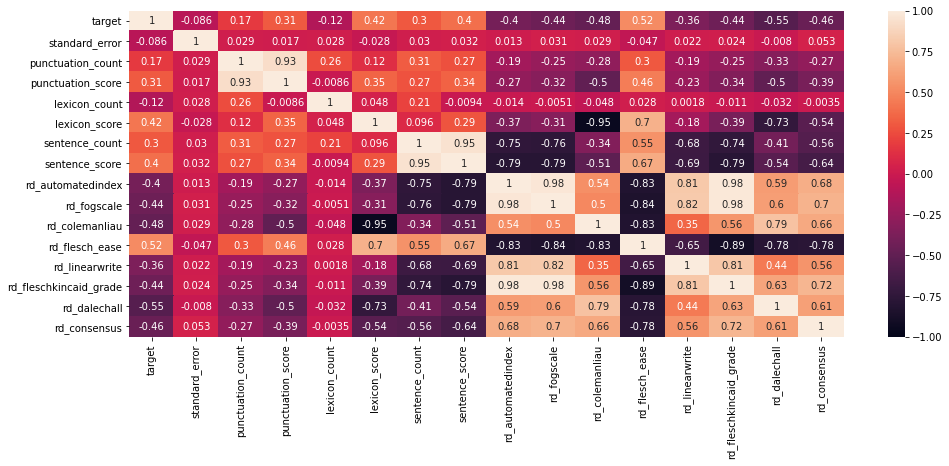

In [108]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)

# BEST OPTIONS:
# rd_dalechall -0.55
# rd_flesch_ease 0.52
